In [7]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
from datetime import datetime 
import warnings         
warnings.filterwarnings('ignore')



In [9]:
# Load Customers.csv
customers = pd.read_csv(r"C:\Users\yadav\Videos\Customers.csv")
products = pd.read_csv(r"C:\Users\yadav\Videos\Products.csv")
transactions = pd.read_csv(r"C:\Users\yadav\Videos\Transactions.csv")

In [10]:
customers.head(20)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [11]:
products.head() 


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [12]:
transactions.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [13]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


In [14]:
# 1. Join Transactions with Customers on CustomerID
transactions_with_customer = pd.merge(transactions, customers, on='CustomerID', how='left')


In [15]:
final_df= pd.merge(transactions_with_customer, products, on='ProductID', how='left')


In [16]:
final_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


# EDA

In [17]:
#1. Basic Inspection
print(final_df.head())
print(final_df.shape)
print(final_df.info())
print(final_df.describe(include='all'))


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [18]:
# 1. Handle Missing Values

# Check for missing values before handling
print(final_df.isnull().sum())


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [19]:
# Step 4: Check for Duplicates
print("Total Duplicates:", final_df.duplicated().sum())

Total Duplicates: 0


In [20]:
# Step 5: Basic Summary Statistics
print("Numerical Columns Stats:\n", final_df[['Quantity', 'TotalValue', 'Price_x', 'Price_y']].describe())

Numerical Columns Stats:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [21]:
# Step 6: Transaction Date Analysis
final_df['TransactionDate'] = pd.to_datetime(final_df['TransactionDate'])
final_df['TransactionYear'] = final_df['TransactionDate'].dt.year
final_df['TransactionMonth'] = final_df['TransactionDate'].dt.month
final_df['TransactionDay'] = final_df['TransactionDate'].dt.day
final_df['TransactionHour'] = final_df['TransactionDate'].dt.hour

In [22]:
final_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,TransactionYear,TransactionMonth,TransactionDay,TransactionHour
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,8,25,12
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,5,27,22
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,4,25,7
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,26,22
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3,21,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86,2024,10,24,8
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86,2024,6,4,2
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86,2024,4,5,13
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86,2024,9,29,10


In [23]:
# Add Month, Day, Hour columns from TransactionDate
final_df['Month'] = pd.to_datetime(final_df['TransactionDate']).dt.month
final_df['Day'] = pd.to_datetime(final_df['TransactionDate']).dt.day
final_df['Hour'] = pd.to_datetime(final_df['TransactionDate']).dt.hour


# ANALYSIS

# Time-Based Trends

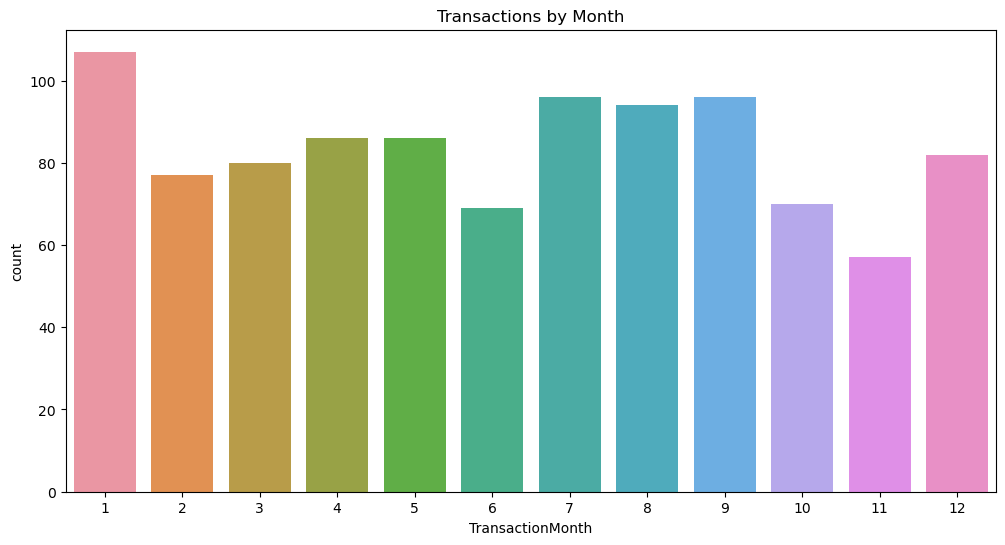

In [24]:

plt.figure(figsize=(12, 6))
sns.countplot(x='TransactionMonth', data=final_df)
plt.title('Transactions by Month')
plt.show()

In [25]:
average order per day?


Object `day` not found.


In [ ]:
average order per day

In [26]:
orders_per_day = final_df.groupby(final_df['TransactionDate'].dt.date)['TransactionID'].count()
average_orders_per_day = orders_per_day.mean()
print(f"\nAverage Orders per Day: {average_orders_per_day:.2f}")




Average Orders per Day: 2.97


# Number of Transactions by Region

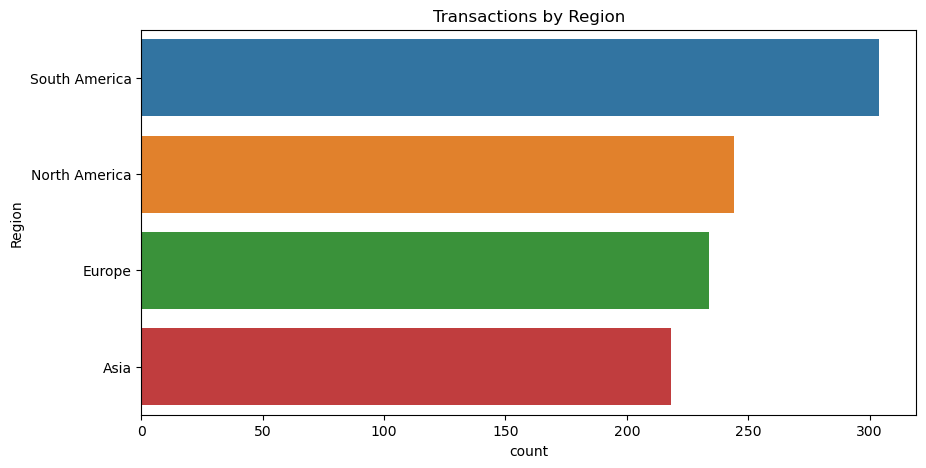

In [27]:
# Region Analysis
plt.figure(figsize=(10, 5))
sns.countplot(y='Region', data=final_df, order=final_df['Region'].value_counts().index)
plt.title('Transactions by Region')
plt.show()

# Most selling Product by Category Analysis


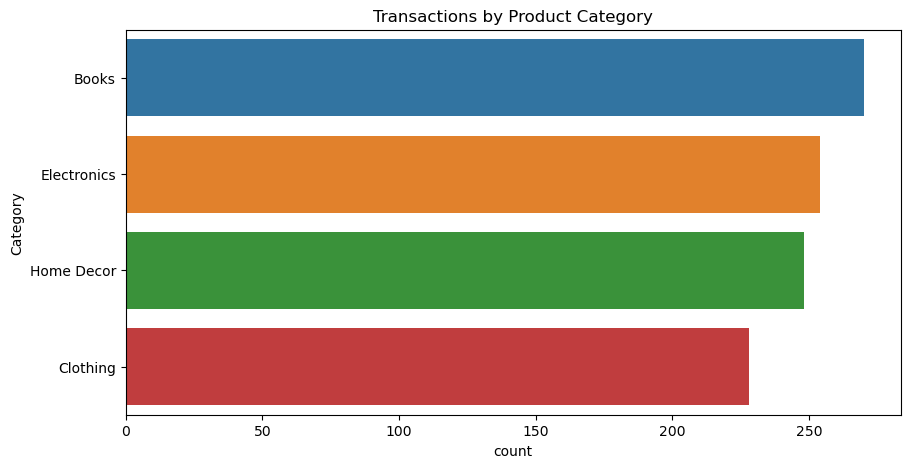

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Category', data=final_df, order=final_df['Category'].value_counts().index)
plt.title('Transactions by Product Category')
plt.show()

# Top 10 Customers by Transaction Frequency

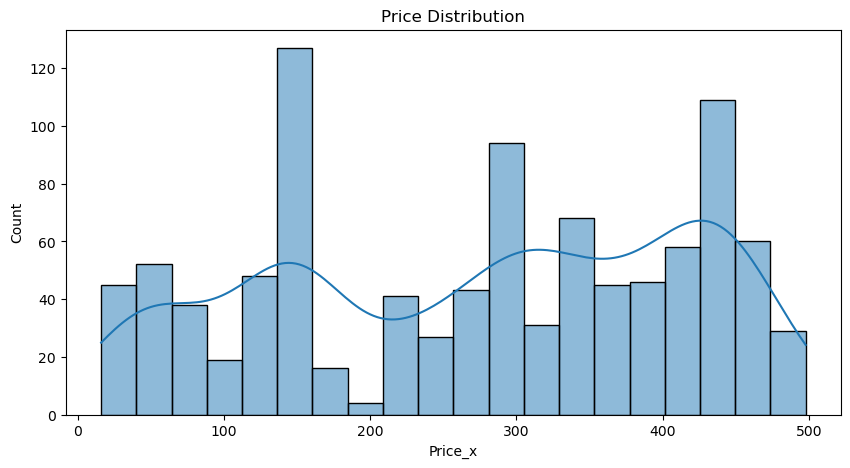

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(final_df['Price_x'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

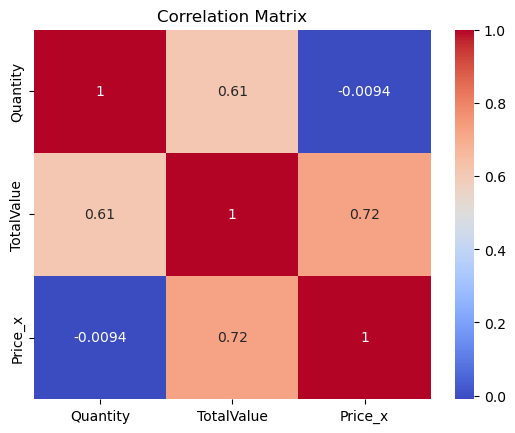

In [30]:
#Correlation Analysis
corr_matrix = final_df[['Quantity', 'TotalValue', 'Price_x']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Total Revenue by Region

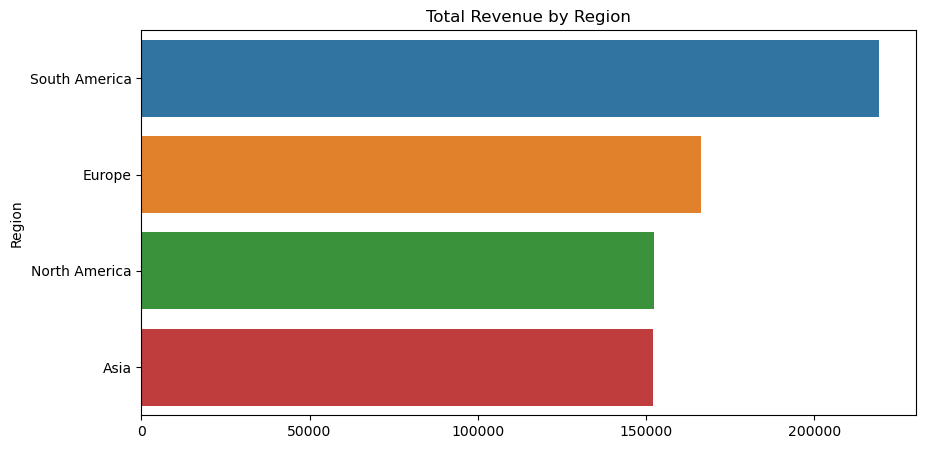

In [31]:
region_revenue = final_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=region_revenue.values, y=region_revenue.index)
plt.title('Total Revenue by Region')
plt.show()

# Top 10 Products by Transaction Count

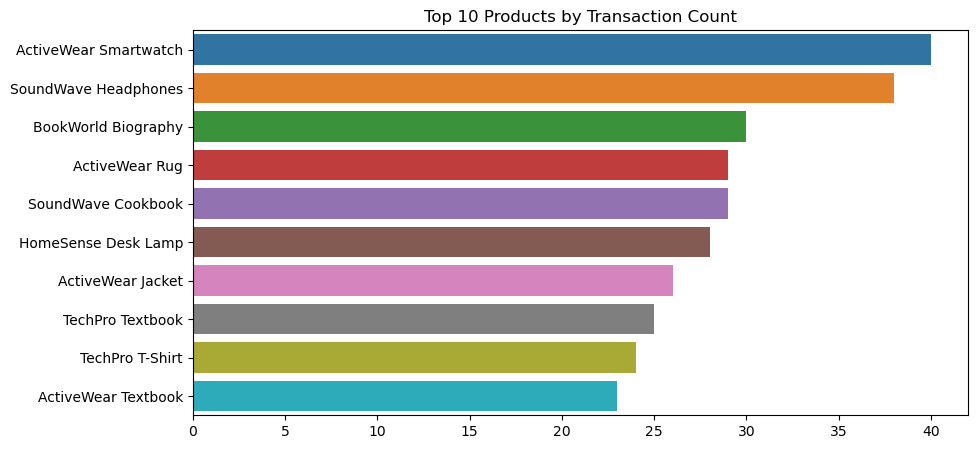

In [32]:
top_products = final_df['ProductName'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Transaction Count')
plt.show()

# Customer Lifetime Value (CLV)


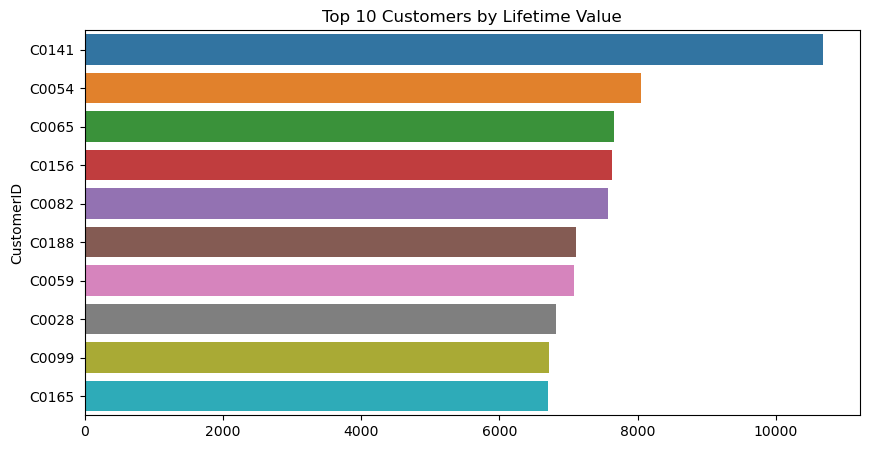

In [33]:
customer_clv = final_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_clv.values, y=customer_clv.index)
plt.title('Top 10 Customers by Lifetime Value')
plt.show()

# Average Transaction Value by Category


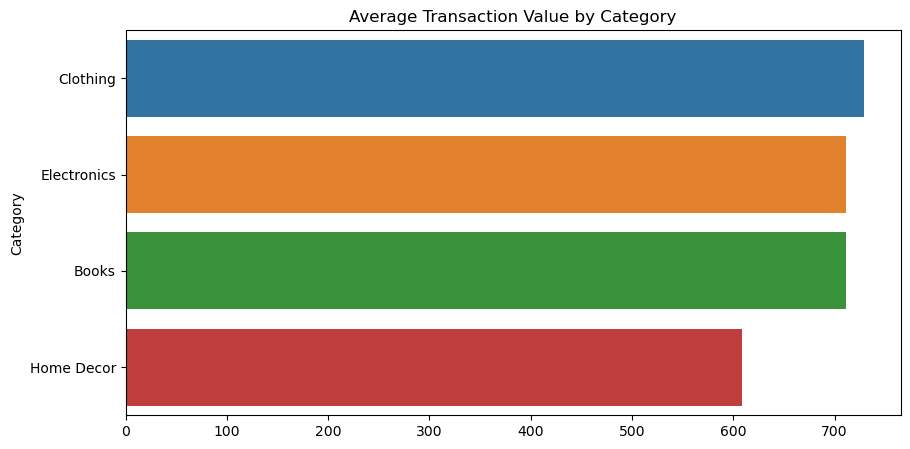

In [34]:
# Step 19: Average Transaction Value by Category
avg_value_category = final_df.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_value_category.values, y=avg_value_category.index)
plt.title('Average Transaction Value by Category')
plt.show()

In [35]:
# Pivot Table for Average Transaction Value by Category
pivot_avg_value = pd.pivot_table(
    final_df,
    values='TotalValue',
    index='Category',
    aggfunc='mean'
).sort_values(by='TotalValue', ascending=False)

print(pivot_avg_value)

             TotalValue
Category               
Clothing     728.818684
Electronics  711.746063
Books        711.657296
Home Decor   608.443266


# Cohort Analysis (Signup vs Transaction)


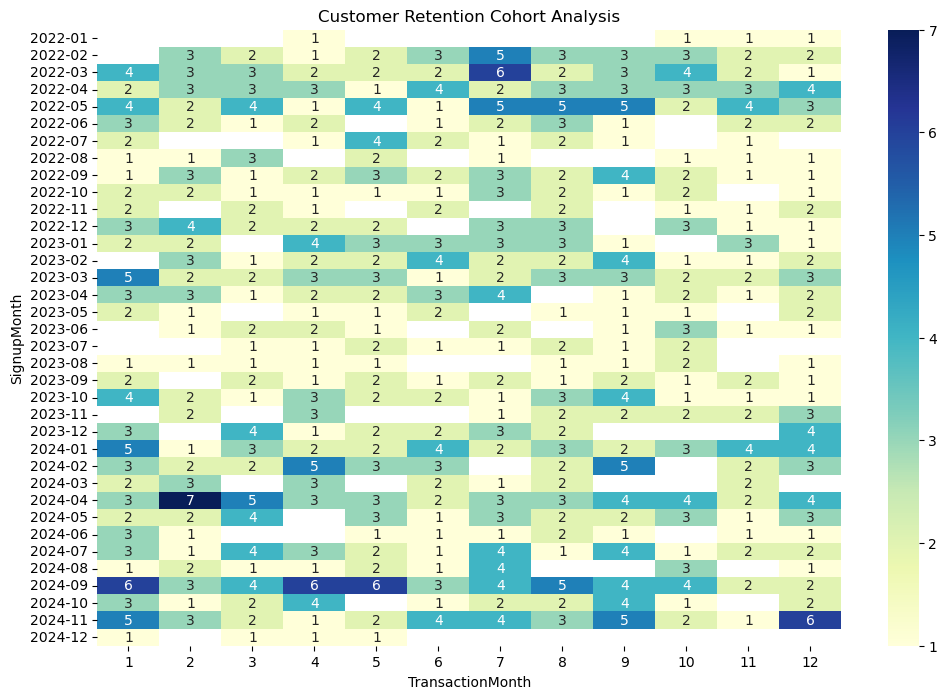

In [36]:
final_df['SignupDate'] = pd.to_datetime(final_df['SignupDate'])
final_df['SignupMonth'] = final_df['SignupDate'].dt.to_period('M')
cohort_data = final_df.groupby(['SignupMonth', 'TransactionMonth'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot_table(index='SignupMonth', columns='TransactionMonth', values='CustomerID')
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Customer Retention Cohort Analysis')
plt.show()

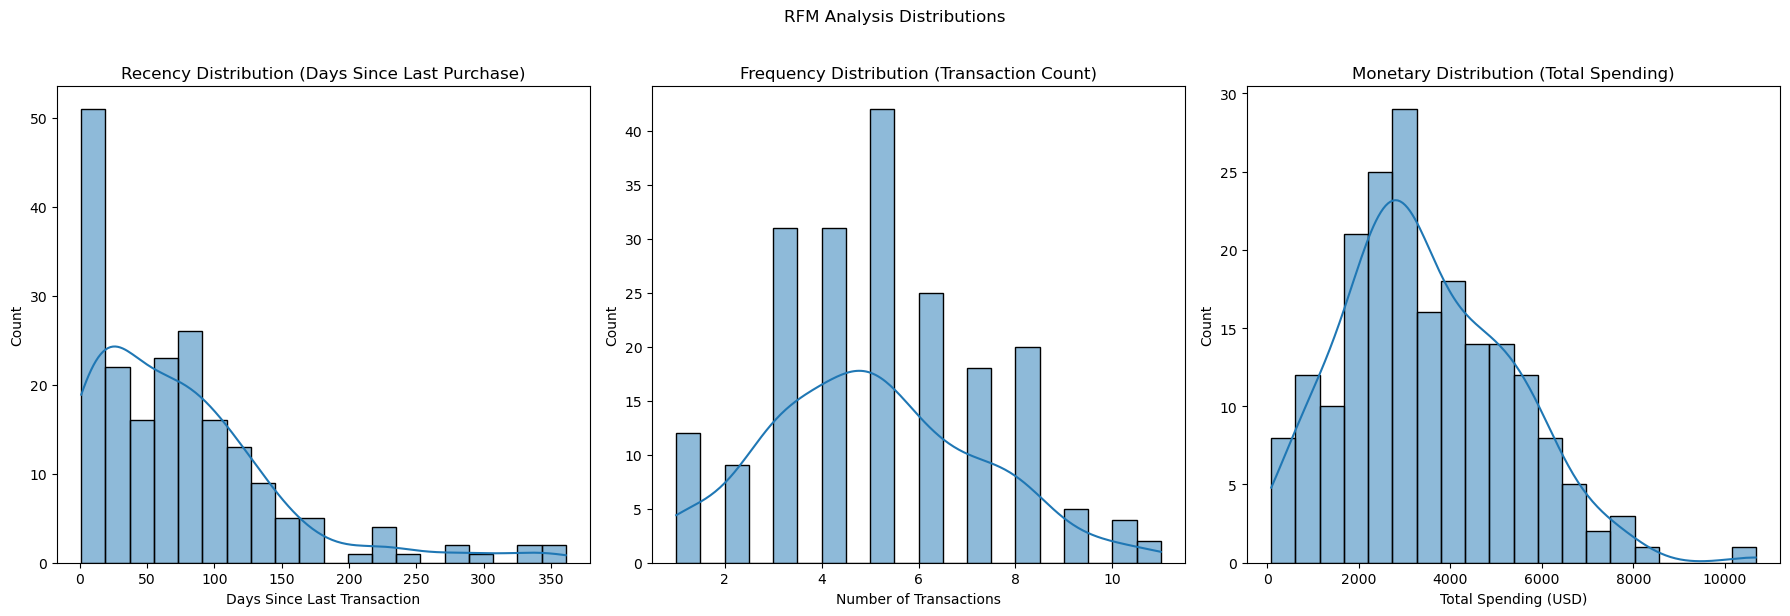

In [37]:
# RFM Analysis with Enhanced Labels
snapshot_date = final_df['TransactionDate'].max() + pd.DateOffset(days=1)
rfm = final_df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days,
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TotalValue': 'Monetary'
})

# Plot RFM distributions with labels
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Recency
sns.histplot(rfm['Recency'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Recency Distribution (Days Since Last Purchase)')
axes[0].set_xlabel('Days Since Last Transaction')

# Frequency
sns.histplot(rfm['Frequency'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Frequency Distribution (Transaction Count)')
axes[1].set_xlabel('Number of Transactions')

# Monetary
sns.histplot(rfm['Monetary'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Monetary Distribution (Total Spending)')
axes[2].set_xlabel('Total Spending (USD)')

plt.suptitle('RFM Analysis Distributions', y=1.02)
plt.tight_layout()
plt.show()

# Are there any underperforming regions, products, or categories?


In [38]:
# Pivot the data so each row represents a transaction and each column represents a product
basket = final_df.pivot_table(index='TransactionID', columns='ProductName', values='Quantity', aggfunc='sum')

# Replace NaN with 0 and make all values binary (0 or 1) for the presence of a product
basket = basket.fillna(0).applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort rules by lift (higher lift indicates stronger association)
rules = rules.sort_values(by='lift', ascending=False)

# Display top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


C:\Users\yadav\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Region vs. Category Preferences


<Figure size 1400x800 with 0 Axes>

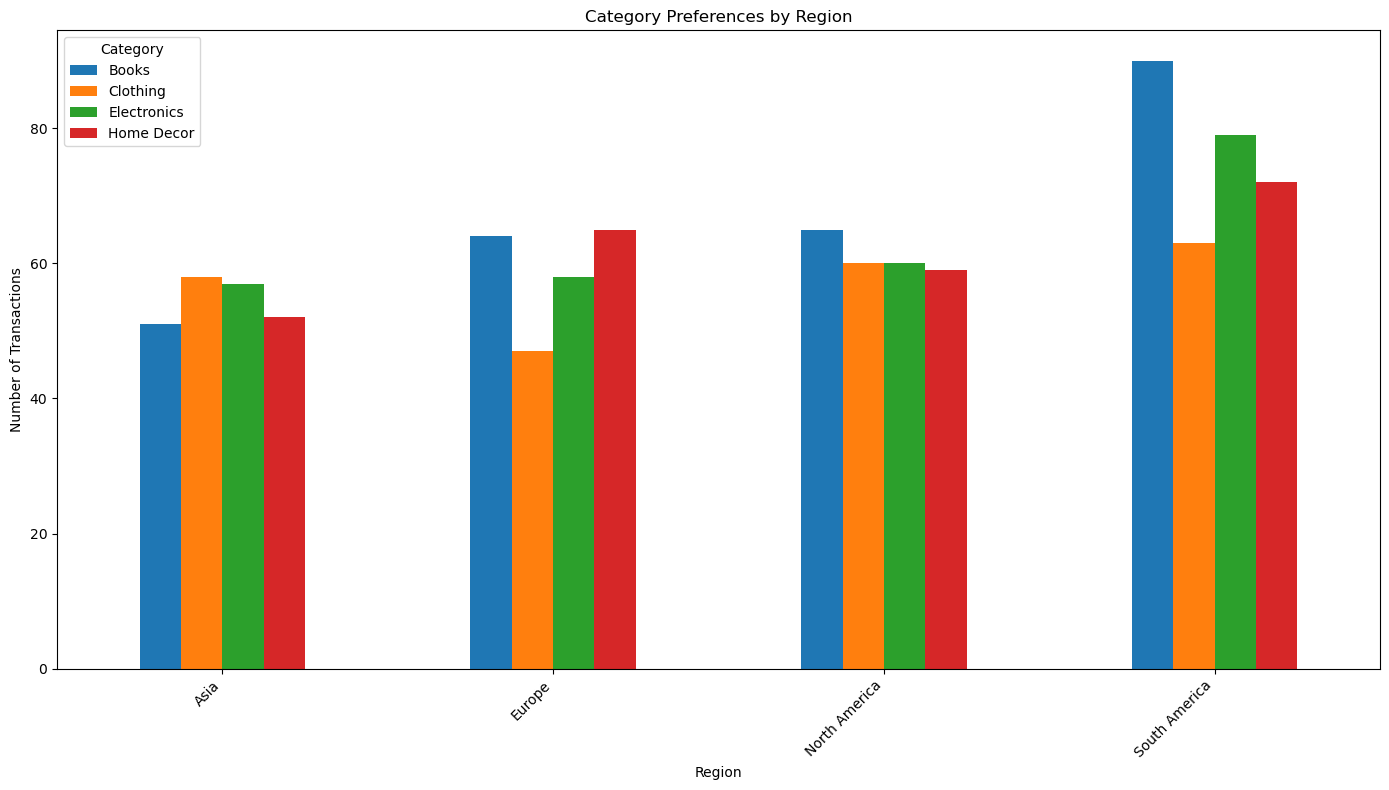

In [39]:

region_category_counts = final_df.groupby(['Region', 'Category']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
region_category_counts.plot(kind='bar', figsize=(14, 8))
plt.title('Category Preferences by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()



# Customer Purchase Behavior over Time (since signup):





Complex Question 2: Customer Purchase Behavior Over Time Since Signup


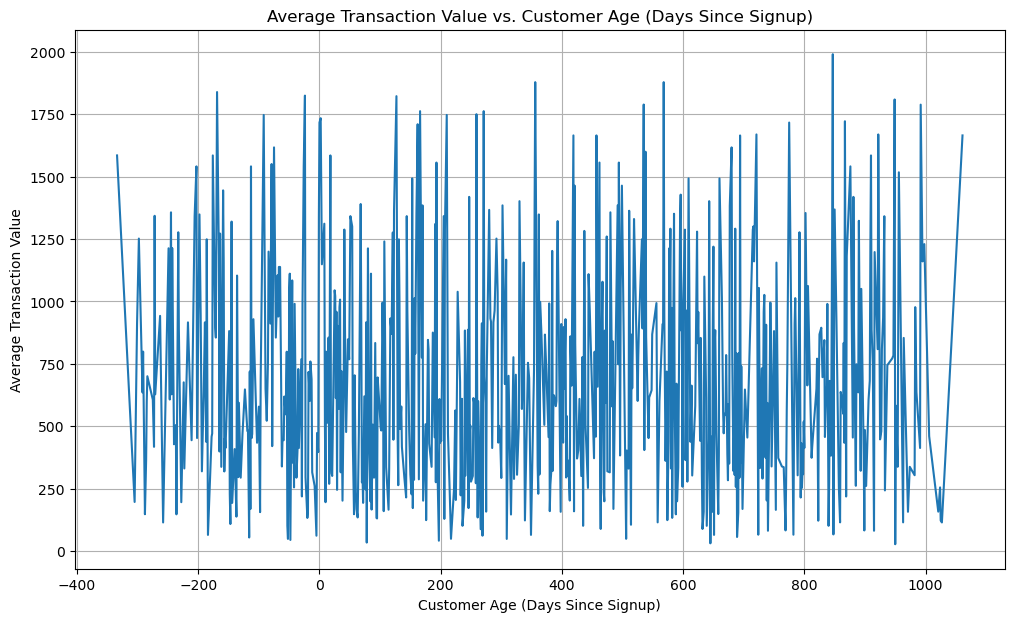

In [40]:
print("\n"+"="*50+"\n")
print("Complex Question 2: Customer Purchase Behavior Over Time Since Signup")

# Calculate Customer Age (in days since signup) at the time of each transaction
final_df['CustomerAgeAtTransaction'] = (final_df['TransactionDate'] - final_df['SignupDate']).dt.days

# Group by Customer Age and analyze average TotalValue and Frequency

# For average TotalValue over customer age:
avg_value_vs_age = final_df.groupby('CustomerAgeAtTransaction')['TotalValue'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x='CustomerAgeAtTransaction', y='TotalValue', data=avg_value_vs_age)
plt.title('Average Transaction Value vs. Customer Age (Days Since Signup)')
plt.xlabel('Customer Age (Days Since Signup)')
plt.ylabel('Average Transaction Value')
plt.grid(True)
plt.show()

# For Transaction Frequency Bands

# What are the top-selling products by revenue and quantity?



Top 10 Products by Revenue:
 ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


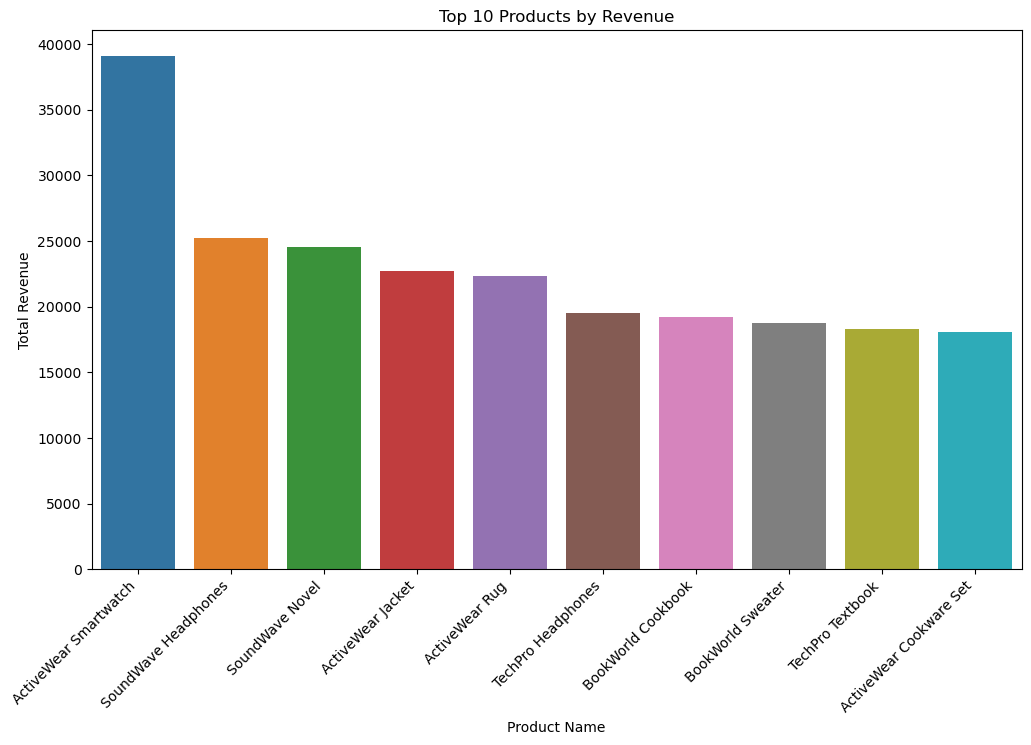

In [41]:
product_revenue = final_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
top_products_revenue = product_revenue.head(10) # Top 10 products by revenue

print("\nTop 10 Products by Revenue:\n", top_products_revenue)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_products_revenue.index, y=top_products_revenue.values)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()


In [42]:
# Top Products by Quantity
product_quantity = final_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
top_products_quantity = product_quantity.head(10) # Top 10 products by quantity

print("\nTop 10 Products by Quantity:\n", top_products_quantity)




Top 10 Products by Quantity:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64
